<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Validation-and-Over-training" data-toc-modified-id="Model-Validation-and-Over-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model Validation and Over-training</a></span><ul class="toc-item"><li><span><a href="#Validation---simple-way" data-toc-modified-id="Validation---simple-way-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Validation - simple way</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Selecting-a-sensible-Model" data-toc-modified-id="Selecting-a-sensible-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Selecting a sensible Model</a></span></li><li><span><a href="#Validation-curves-in-Scikit-Learn" data-toc-modified-id="Validation-curves-in-Scikit-Learn-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Validation curves in Scikit-Learn</a></span><ul class="toc-item"><li><span><a href="#Linear-regression-example" data-toc-modified-id="Linear-regression-example-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Linear regression example</a></span></li></ul></li><li><span><a href="#Learning-Curves-and-Data-Size" data-toc-modified-id="Learning-Curves-and-Data-Size-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Learning Curves and Data Size</a></span></li><li><span><a href="#Further-validation-issues" data-toc-modified-id="Further-validation-issues-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Further validation issues</a></span></li></ul></li></ul></div>

## Model Validation and Over-training

A critical part of Supervised Learning is the so-called **over-training**
* Model learns specific features of the elements in training datasets rather than the general properties
  * one symptom is difference between accuracy for training and validation sets
  * depends on details of model
  * and size of training data sets
    * most critical for small samples
    
To check and avoid  over-training a proper **validation**
plays a crucial role 


***
**How not to do it - brief demo with Iris data and kNN:**

In [1]:
# take iris directly from sklearn, already prepared for easy use
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [2]:
# train model
model.fit(X, y)
# apply to data
y_model = model.predict(X)

In [3]:
# check accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_model))

1.0


**100 % accuracy** -- perfect model

Can this be true?


***
Not really. Two problems:
* we used same dataset for training and test, not sensitive to overtraining
* special case of kNN with n=1:
  * by construction will always give 100% when training dataset is used for testing:
    * It will always find identical element as single closest neighbor and correctly identify it
* kNN with n>1 not guaranteed to give 100% but still overtraining likely to happen



***
### Validation - simple way

Better approach: **split into train and test sample**

In [4]:
#Py 3.6 from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

**Disadvantage:**
* reduced statistics for training  
&rarr; worse peformance
* only one validation set
  * difficult to estimate uncertainty on modeling performance
***
We could of course turn it around and use training set for test and vice-versa:

In [5]:
# fit the model on other set of data
model.fit(X2, y2)

# evaluate the model on the first set of data
y1_model = model.predict(X1)
accuracy_score(y1, y1_model)

0.96

### Cross-validation

An obvious extension of this approach is smaller validation samples and do several cycles, each time taking a new slice fo validation, e.g.
* 20% for validation
* yields 5 different combinations of validation and training data sets


![](figures/05.03-5-fold-CV.png)

***
**Procedure doing that automatically is included:**  

In [6]:
from sklearn.model_selection import cross_val_score
sc=cross_val_score(model, X, y, cv=5)

In [7]:
print(sc)
print(sc.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


Did 5 iterations with the diffeent combinations of training/validation set.
***
**Validation with 1 element:**  
Also extreme case makes sense, 
* only 1 element for validation, all others for training
* repeat #-element times




In [8]:
from sklearn.model_selection import LeaveOneOut
sc=cross_val_score(model, X, y, cv=LeaveOneOut())

In [9]:
sc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
sc.mean()

0.96

***
### Selecting a sensible Model

One of the central questions in ML is the choice of a sensible model and/or Model parameters, one must find the proper trade-off between **over-training**:
* model adapts to specific features of training dataset and not general properties
* ML-term: **high variance**

and **under-performance**:
* model fails to identify/describe general properties
* ML term **high bias**

The effect can be nicely illustrated in **polynom fitting**.
(In case of classical least-square fits $\chi^2$ is a good measure to judge, i.e. what polynom degree is required for a sensible fit of data-points).

It is instructive to take polynom fit also in the ML context, following the discussion in the ML handbook.

***
Following figure illustrates effect for polynomial fit to data points:
* blue points used for training
* red for validation

![](figures/05.03-bias-variance-2.png)

***
The basic problem of this bias-variance trade-off is nicely illustrated in the **validation curve** shown below:

![](figures/05.03-validation-curve.png)

* score for training data in general improves with model complexity, but at some stage the improvement is due to learning **features of training data**
* score for validation data reaches maximum
&rarr; **sweet spot** for model selection 

### Validation curves in Scikit-Learn
#### Linear regression example

sklearn also provides a linear regression model (LinearRegression). 
This is similar to the usual linear regression in **scipy**.  
However, in general it is meant for multi-dimensional input vectors and not just 1 dimension as in the classic regression case.

On the other hand, sklearn LinearRegression only supports directly linear polynoms, no higher order terms:
$$
y = a_0 + \sum a_i x_i
$$
but not
$$
y = a_0 + \sum a_i x_1^i
$$


However, one can circumvent this limitation by a simple trick:
* treat higher-degree polynom values just as  additional elements of input vector:
$$
x_i = x_1^i
$$




In [11]:
# trick with sklearn to implement higher-order polynom fit
from sklearn.preprocessing import PolynomialFeatures # create polynom
from sklearn.linear_model import LinearRegression    # model
from sklearn.pipeline import make_pipeline           

def PolynomialRegression(degree=2, **kwargs):       # combine both in pipeline
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

**Illustrate usage of PolynomialFeatures**

In [12]:
import numpy as np
pf=PolynomialFeatures(2)
xt = np.array([4]).reshape(1,1)
print (xt , '\n', pf.fit_transform(xt))

[[4]] 
 [[ 1.  4. 16.]]



**Function to generate funny-shaped data**


In [13]:
import numpy as np

def make_data(N, err=1.0, rseed=2):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

***
Visualize points and fit of different poly degree:

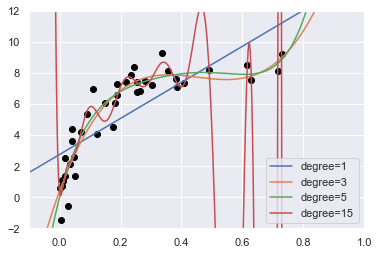

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5, 15]:
#for degree in [1, 3]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

As expected, using a too high polynom degree results in wildly fluctuating curves.  
The problem is how to find proper degree.

Automated procedure with  ``validation_curve`` provided by Scikit-Learn.
Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

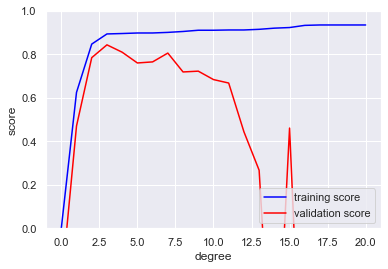

In [15]:
# 
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                            param_name='polynomialfeatures__degree', 
                                            param_range=degree, cv=7)
                                          
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The validation curve shows that already with **degree 3** the maximum for the validation score is reached, so that would be best choice for this model.



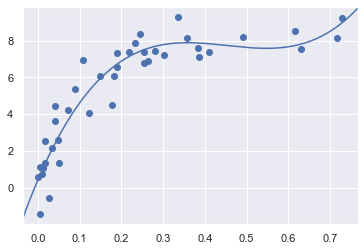

In [16]:
# show data and degree 3 fit
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves and Data Size

The size of the data set plays an imprtant role
* for small data sets the training is much more likely to train specific data features
* with increasing size that effect gets smaller
* training and validation score get closer


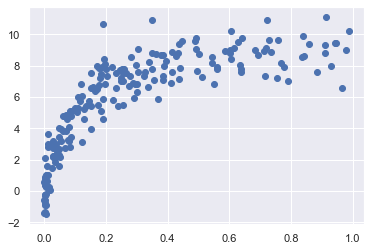

In [17]:
# repeat with 200 data points instead of 40
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

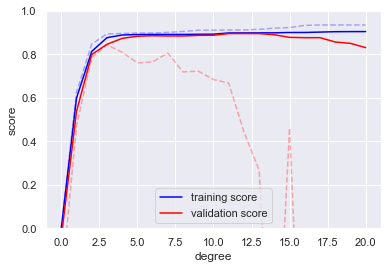

In [18]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            param_name='polynomialfeatures__degree', 
                                            param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [19]:
validation_curve?

* training much more robust with larger dataset (no as sensitive on model parameters (degree of polynominal) as before)
* training and validation score much closer
* no abrupt breakdown of validation score at high degree
* validation maximum at somewhat higher degree

### Further validation issues
How to do the validation and find proper choice of parameters depends of course also on the details of the model
* some models have 0 or just 1 parameter - usually rather straightforward
* others can have many different parameters - validation becomes multi-dimensional problem 

&rarr; further tools in sklearn